In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Transfer from CSV to Pandas 

In [2]:
list_files = os.listdir("./cleanAssets")
num_files = len(list_files)
data = None
j = 0
for file in list_files:
    print(j)
    print(file)
    file_path = "./cleanAssets/" + file
    total_str = ""
    if (os.path.isfile(file_path)):
        df = pd.read_csv(file_path)
        if df.shape[0] == 91:
            tempValues = list(df[[df.columns[1]]].values.T)[0]
            if('Thousands' in str(df.columns[0])):
                for i in range(len(tempValues)):
                    #print(tempValues[i])
                    if tempValues[i] == '-':
                        tempValues[i] = 0
                    elif '%' not in tempValues[i]:
                        tempValues[i] =float(tempValues[i]) * 1000
                    elif '%' in tempValues[i]:
                        tempValues[i] = float(tempValues[i].replace('%',''))
                    elif math.isnan(tempValues[i]):
                        tempValues[i] = 0

            elif('Millions' in str(df.columns[0])):
                for i in range(len(tempValues)):
                    #print(tempValues[i])
                    if tempValues[i] == '-':
                        tempValues[i] = 0
                    elif '%' not in tempValues[i]:
                        tempValues[i] =float(tempValues[i]) * 1000000
                    elif '%' in tempValues[i]:
                        tempValues[i] = float(tempValues[i].replace('%',''))
                    elif math.isnan(tempValues[i]):
                        tempValues[i] = 0

                        
            else:
                print('new factor')

            tempHeader = df[df.columns[0]].values.T
            tempValues = np.array([tempValues])
            tempdf = pd.DataFrame(tempValues, index=[j], columns = tempHeader)
            if j == 0:
                data = tempdf
            else:
                data = pd.concat([data, tempdf])

            j += 1
        else:
            print('skipped')


0
WesBanco Inc. .csv
1
Mid Penn Bancorp .csv
2
LCNB Corporation .csv
3
FVCBankcorp Inc. .csv
4
Valley National Bancorp .csv
5
CNB Financial Corporation .csv
6
Preferred Bank .csv
7
Citizens & Northern Corp .csv
8
UMB Financial Corporation .csv
9
HBT Financial Inc. .csv
10
Truist Financial Corporation .csv
11
First Seacoast Bancorp Inc. .csv
12
Horizon Bancorp Inc. .csv
13
City Holding Company .csv
14
TC Bancshares Inc. .csv
15
Comerica Incorporated .csv
16
Amalgamated Financial Corp.  .csv
17
Capital City Bank Group .csv
18
First Community Bankshares Inc. .csv
19
MetroCity Bankshares Inc. .csv
20
Cadence Bank .csv
21
Mid-Southern Bancorp Inc. .csv
22
Shore Bancshares Inc .csv
23
PB Bankshares Inc. .csv
24
MainStreet Bancshares Inc. .csv
25
First Interstate BancSystem Inc. .csv
26
Oak Valley Bancorp .csv
27
Columbia Financial Inc. .csv
28
Southside Bancshares Inc. .csv
29
Webster Financial Corporation .csv
30
Union Bankshares Inc. .csv
31
Fifth Third Bancorp .csv
32
Meridian Corporation

In [3]:
data.head(3)
data1 = data

In [14]:
def euc_distance(x1, x2):
    #Do the thing
    return np.sqrt(np.sum((x1-x2)**2))

# This Code is from CSCI 4022 Homework  3

In [5]:
def kmeans(df, distance, k=4, tol=0.05): 
    """
    Usage: input 
        df=data frame, 
        k=# of clusters
        tol=tolerance for L_2 convergance check on centroids
    """ 
    #preperations of data
    X = df.values
    
    # Initializing Clusters
    iterations = 0
    diff = 1
    cluster = np.zeros(X.shape[0])
    centroids = data.sample(n=k).values
    error = None
    
    while diff:
        # for each observation
        distances = np.zeros(X.shape[0])
        for i, row in enumerate(X):
            minDist = float('inf')
            # dist of the point from all centroids
            for idx, centroid in enumerate(centroids):
                d = distance(centroid, row)
                # store closest centroid
                if minDist > d:
                    minDist = d
                    distances[i] = minDist
                    cluster[i] = idx
        
        #calculate reconstruction error
        newError = np.sum(distances) 
        centroids = pd.DataFrame(X).groupby(by=cluster).mean().values


        if iterations>1:
             if error - newError <=tol:
                diff = 0
        
        error = newError
                
        iterations +=1

    #print("iterations", iterations)
    return centroids, cluster, error

### Elbow Graph

In [6]:
data = data1[['Total Shareholders Equity / Total Assets', 'Assets - Total Growth']]

In [7]:
data.head(3)

,Total Shareholders Equity / Total Assets,Assets - Total Growth
0,14.33,0.03
1,11.38,-4.07
2,10.43,0.86


In [8]:
#process data
X = data.values

results = []
x = [] 
for i in range(10):
    centroids, cluster, error = None, None, None
    minError = float('inf')

    for j in range(20):
        #calculate K-Means
        c1, c2, e = kmeans(data, euc_distance, k=i+1)
        if e < minError: 
            centroids, cluster, error = c1, c2, e
            #print('error', error)

    
    results.append(error)
    x.append(i+1)

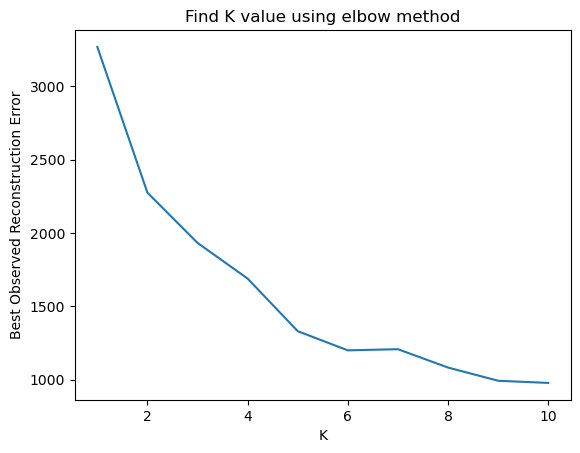

In [9]:
plt.plot(x, results)
plt.title('Find K value using elbow method')
plt.xlabel('K')
plt.ylabel('Best Observed Reconstruction Error')
plt.show()

In [10]:
#process data
X = data.values

centroids, cluster, error = None, None, None
minError = float('inf')

for i in range(20):
    #calculate K-Means
    c1, c2, e = kmeans(data, euc_distance, k=6)
    if e < minError: 
        centroids, cluster, error = c1, c2, e
print('error', error)

error 1172.5653766739574


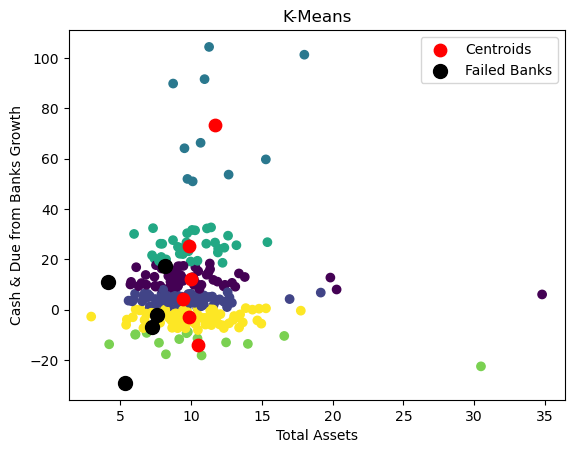

In [16]:
#plot data
plt.scatter(X[:,0],X[:,1], c=cluster)
plt.scatter(centroids[:,0],centroids[:,1], s=80, color='r', label='Centroids')
#svb
plt.scatter(X[112,0],X[111,1], s=100, color="black")
#silvergate
plt.scatter(X[178,0],X[178,1], s=100, color="black")
#first republic
plt.scatter(X[61,0],X[61,1], s=100, color="black")
#union
plt.scatter(X[30,0],X[30,1], s=100, color="black")
#signature
plt.scatter(X[233,0],X[233,1], s=100, color="black", label='Failed Banks')


#plt.scatter(sigbank_coords[0], sigbank_coords[1], color="black")
plt.title('K-Means')
plt.xlabel('Total Assets')
plt.ylabel('Cash & Due from Banks Growth')
plt.legend()
plt.show()

In [12]:
print(X.shape)

(297, 2)


In [13]:
print(X[61,0],X[61,1])

8.18 17.41
